In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [7]:
#Data exploration for Steam Games data

# Specify the file path
file_path = 'data/jsons/SteamGames.json'

# Load the data from the JSON file
steam_games = pd.read_json(file_path)

# Display the first few rows of the dataframe
print(steam_games.head())

# Basic information about the dataframe
print(steam_games.info())

# Summary statistics for numerical columns
print(steam_games.describe())

# Checking for Missing Values
print(steam_games.isnull().sum())

# Number of Unique Values in Each Column
print(steam_games.nunique())

# Distribution of 'appid' Column
print(steam_games['appid'].describe())

# Frequency Distribution of 'name' Column
print(steam_games['name'].value_counts().head(10))


   appid                   name
0      8                 winui2
1     10         Counter-Strike
2     20  Team Fortress Classic
3     30          Day of Defeat
4     40     Deathmatch Classic
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 152331 entries, 0 to 152330
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   appid   152331 non-null  int64 
 1   name    152331 non-null  object
dtypes: int64(1), object(1)
memory usage: 2.3+ MB
None
              appid
count  1.523310e+05
mean   1.423104e+06
std    8.095838e+05
min    8.000000e+00
25%    7.227000e+05
50%    1.384000e+06
75%    2.107675e+06
max    2.987820e+06
appid    0
name     0
dtype: int64
appid    152331
name     150791
dtype: int64
count    1.523310e+05
mean     1.423104e+06
std      8.095838e+05
min      8.000000e+00
25%      7.227000e+05
50%      1.384000e+06
75%      2.107675e+06
max      2.987820e+06
Name: appid, dtype: float64
Spare                          

In [8]:
# Load the data
most_played = pd.read_json('SteamMostPlayed.json')
top_sellers = pd.read_json('SteamTopSellers.json')

# Add a rank column based on the index
top_sellers['rank'] = top_sellers.index + 1

# Display the first few rows of each dataset
print("Most Played Games:")
print(most_played.head())

print("\nTop Sellers Games:")
print(top_sellers.head())

# Check data types
print("\nData types in most_played:")
print(most_played.dtypes)

print("\nData types in top_sellers:")
print(top_sellers.dtypes)


Most Played Games:
   rank    appid                 name  max_players_today
0     1      730     Counter-Strike 2            468.270
1     2      570               Dota 2            276.505
2     3  1085660            Destiny 2            100.402
3     4   578080  PUBG: BATTLEGROUNDS             90.317
4     5  1172470        Apex Legends™             86.018

Top Sellers Games:
     appid                              name  rank
0      730                  Counter-Strike 2     1
1  2215430  Ghost of Tsushima DIRECTOR'S CUT     2
2   578080               PUBG: BATTLEGROUNDS     3
3  1145350                          Hades II     4
4   582660                      Black Desert     5

Data types in most_played:
rank                   int64
appid                  int64
name                  object
max_players_today    float64
dtype: object

Data types in top_sellers:
appid     int64
name     object
rank      int64
dtype: object


In [9]:
# Summary statistics
print("\nSummary Statistics for Most Played Games:")
print(most_played.describe())

print("\nSummary Statistics for Top Sellers Games:")
print(top_sellers.describe())



Summary Statistics for Most Played Games:
             rank         appid  max_players_today
count  100.000000  1.000000e+02         100.000000
mean    50.500000  8.925285e+05          32.759960
std     29.011492  7.655056e+05          55.165269
min      1.000000  4.400000e+02           7.765000
25%     25.750000  2.690800e+05          11.751500
50%     50.500000  5.800450e+05          16.397000
75%     75.250000  1.364010e+06          33.411750
max    100.000000  2.936120e+06         468.270000

Summary Statistics for Top Sellers Games:
              appid         rank
count  5.228000e+03  5228.000000
mean   1.217391e+06  2614.500000
std    7.827313e+05  1509.337934
min    1.000000e+01     1.000000
25%    5.411850e+05  1307.750000
50%    1.145660e+06  2614.500000
75%    1.825798e+06  3921.250000
max    2.965870e+06  5228.000000



Missing Values in Most Played Games:
rank                 0
appid                0
name                 0
max_players_today    0
dtype: int64

Unique Values in Most Played Games:


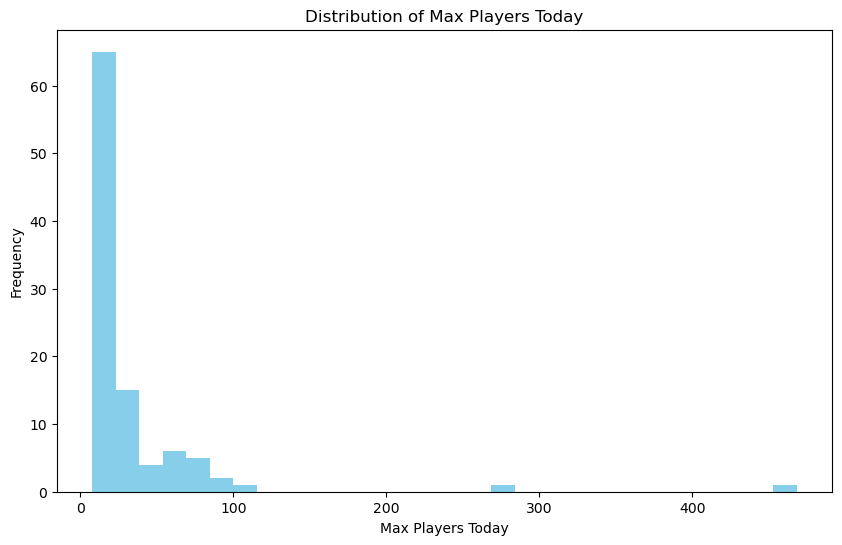

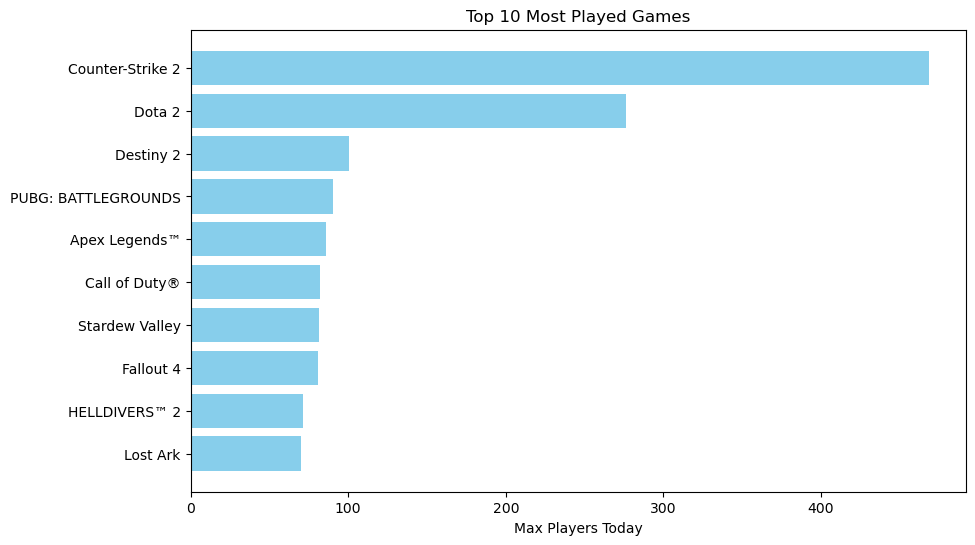

In [10]:
# Checking for missing values
print("\nMissing Values in Most Played Games:")
print(most_played.isnull().sum())

# Number of unique values in each column
print("\nUnique Values in Most Played Games:")
most_played.nunique()

# Distribution of max_players_today
plt.figure(figsize=(10, 6))
plt.hist(most_played['max_players_today'], bins=30, color='skyblue')
plt.xlabel('Max Players Today')
plt.ylabel('Frequency')
plt.title('Distribution of Max Players Today')
plt.show()

# Top 10 most played games
top_10_most_played = most_played.nlargest(10, 'max_players_today')
plt.figure(figsize=(10, 6))
plt.barh(top_10_most_played['name'], top_10_most_played['max_players_today'], color='skyblue')
plt.xlabel('Max Players Today')
plt.title('Top 10 Most Played Games')
plt.gca().invert_yaxis()
plt.show()


In [18]:
merged_data = pd.merge(most_played, top_sellers, on='appid', how='inner', suffixes=('_played', '_sellers'))
merged_data

,rank_played,appid,name_played,max_players_today,name_sellers,rank_sellers
0,1,730,Counter-Strike 2,468.270,Counter-Strike 2,1
1,2,570,Dota 2,276.505,Dota 2,22
2,3,1085660,Destiny 2,100.402,Destiny 2,29
3,4,578080,PUBG: BATTLEGROUNDS,90.317,PUBG: BATTLEGROUNDS,3
4,5,1172470,Apex Legends™,86.018,Apex Legends,13
...,...,...,...,...,...,...
78,95,739630,Phasmophobia,8.546,Phasmophobia,110
79,96,2349820,Hero's Land,8.516,Hero's Land,637
80,97,1778820,TEKKEN 8,8.071,TEKKEN 8,212
81,98,322330,Don't Starve Together,7.837,Don't Starve Together,513


Summary Statistics for Merged Data:
       rank_played         appid  max_players_today  rank_sellers
count    83.000000  8.300000e+01          83.000000     83.000000
mean     49.819277  7.846376e+05          34.382566    149.024096
std      28.702912  7.163330e+05          59.713823    221.132781
min       1.000000  4.400000e+02           7.765000      1.000000
25%      25.500000  2.520300e+05          12.173500     26.500000
50%      51.000000  4.361500e+05          16.315000     79.000000
75%      72.500000  1.172545e+06          33.517500    171.500000
max     100.000000  2.670630e+06         468.270000   1434.000000


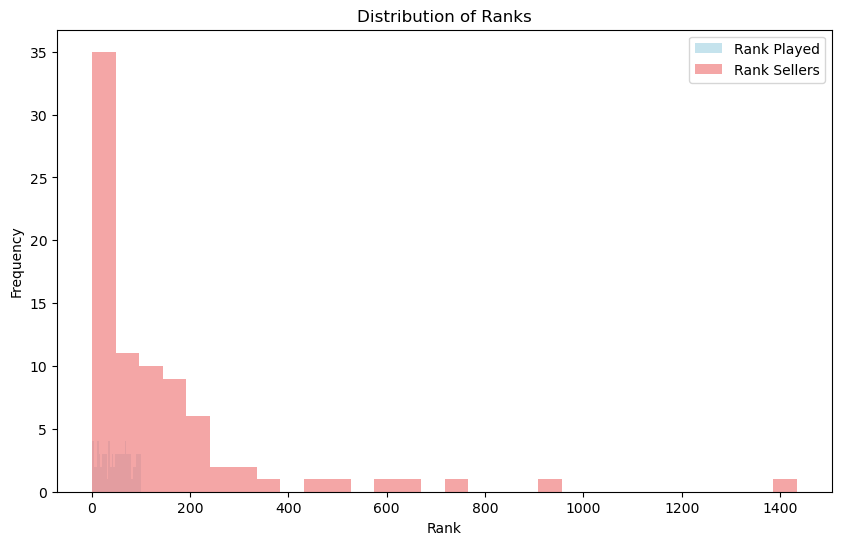

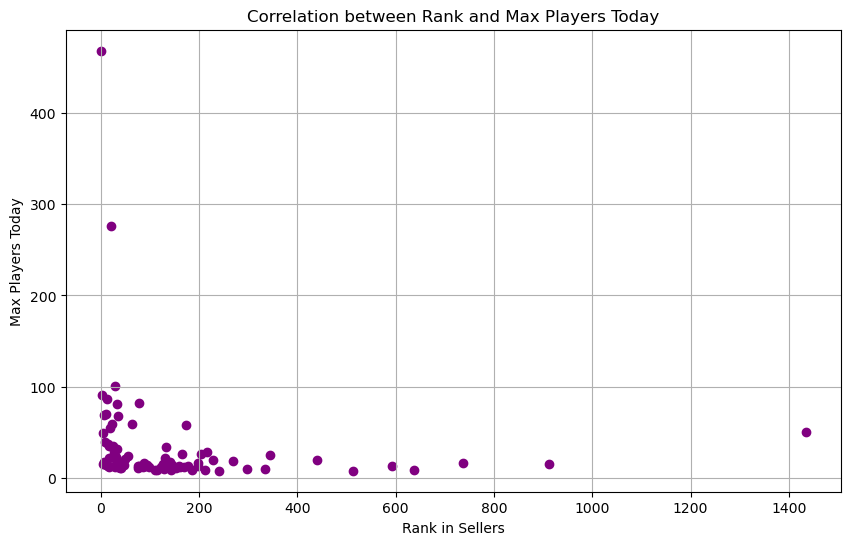

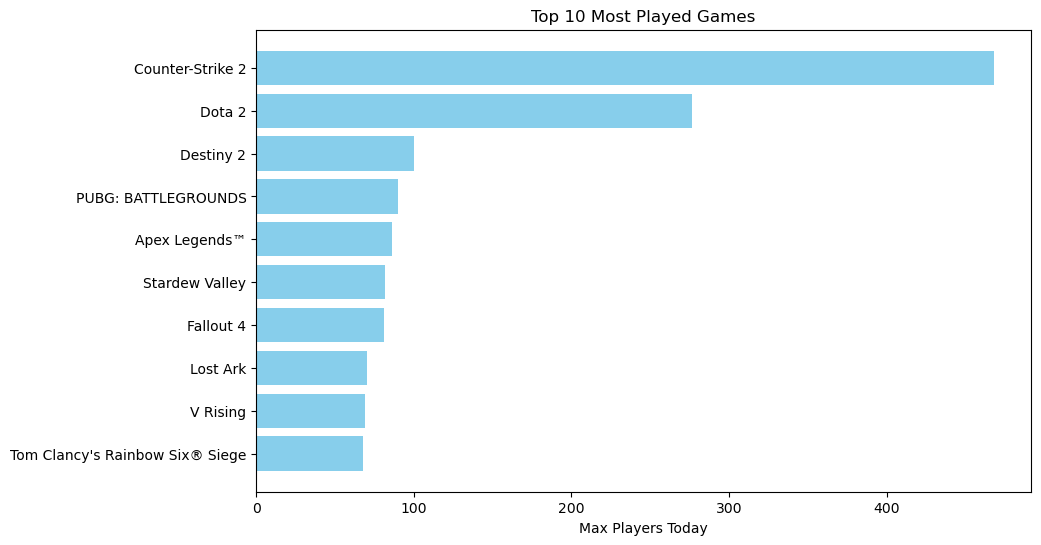

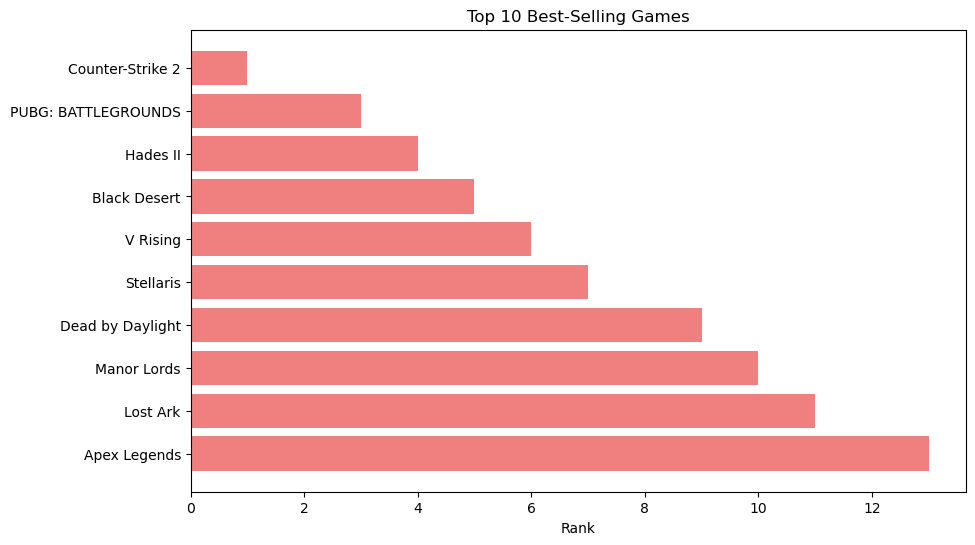


Columns in common_top_10:
Index(['rank_played_most_played', 'appid', 'name_played_most_played',
       'max_players_today_most_played', 'name_sellers_most_played',
       'rank_sellers_most_played', 'rank_played_top_sellers',
       'name_played_top_sellers', 'max_players_today_top_sellers',
       'name_sellers_top_sellers', 'rank_sellers_top_sellers'],
      dtype='object')

Games in both Top 10 Most Played and Top 10 Best-Selling:


,appid,name_played_most_played,rank_played_most_played,max_players_today_most_played,name_sellers_top_sellers,rank_sellers_top_sellers
0,730,Counter-Strike 2,1,468.270,Counter-Strike 2,1
1,578080,PUBG: BATTLEGROUNDS,4,90.317,PUBG: BATTLEGROUNDS,3
2,1172470,Apex Legends™,5,86.018,Apex Legends,13
3,1599340,Lost Ark,10,70.046,Lost Ark,11
4,1604030,V Rising,11,69.153,V Rising,6


In [19]:
# 1. Summary Statistics
print("Summary Statistics for Merged Data:")
print(merged_data.describe())

# 2. Distribution of Ranks
plt.figure(figsize=(10, 6))
plt.hist(merged_data['rank_played'], bins=30, color='lightblue', alpha=0.7, label='Rank Played')
plt.hist(merged_data['rank_sellers'], bins=30, color='lightcoral', alpha=0.7, label='Rank Sellers')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Distribution of Ranks')
plt.legend()
plt.show()

# 3. Correlation Analysis
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['rank_sellers'], merged_data['max_players_today'], color='purple')
plt.xlabel('Rank in Sellers')
plt.ylabel('Max Players Today')
plt.title('Correlation between Rank and Max Players Today')
plt.grid(True)
plt.show()

# 4. Top 10 Most Played Games
top_10_most_played = merged_data.nlargest(10, 'max_players_today')
plt.figure(figsize=(10, 6))
plt.barh(top_10_most_played['name_played'], top_10_most_played['max_players_today'], color='skyblue')
plt.xlabel('Max Players Today')
plt.title('Top 10 Most Played Games')
plt.gca().invert_yaxis()
plt.show()

# 5. Top 10 Best-Selling Games
top_10_top_sellers = merged_data.nsmallest(10, 'rank_sellers')
plt.figure(figsize=(10, 6))
plt.barh(top_10_top_sellers['name_sellers'], top_10_top_sellers['rank_sellers'], color='lightcoral')
plt.xlabel('Rank')
plt.title('Top 10 Best-Selling Games')
plt.gca().invert_yaxis()
plt.show()

# 6. Games that are in the top 10 most played and top 10 best-selling
common_top_10 = pd.merge(top_10_most_played, top_10_top_sellers, on='appid', suffixes=('_most_played', '_top_sellers'))

# Check the columns in common_top_10
print("\nColumns in common_top_10:")
print(common_top_10.columns)

# Adjust column names in the print statement
print("\nGames in both Top 10 Most Played and Top 10 Best-Selling:")
common_top_10[['appid', 'name_played_most_played', 'rank_played_most_played', 'max_players_today_most_played', 'name_sellers_top_sellers', 'rank_sellers_top_sellers']]

In [25]:
#a simple popularity-based recommender system based on their overall popularity among users, without taking into account individual user preferences or behavior.

from sklearn.model_selection import train_test_split

# Merge the datasets
merged_df = pd.merge(steam_games, most_played, on='name', how='left')
merged_df = pd.merge(merged_df, top_sellers, on='name', how='left')
merged_df


# Combine rankings from different datasets
merged_df['popularity_score'] = merged_df['rank_x'].fillna(0) + merged_df['rank_y'].fillna(0)

# Sort the dataframe by popularity score in descending order
popular_games_df = merged_df.sort_values(by='popularity_score', ascending=False)

# Print the top recommended games
print("Top Recommended Games (Popularity-Based):")
print(popular_games_df[['name', 'popularity_score']].head(10))

# Split data into training and testing sets
# We'll use 80% of the data for training and 20% for testing
train_df, test_df = train_test_split(popular_games_df, test_size=0.2, random_state=42)

# Generate recommendations for the testing set (in this case, we'll recommend the top 10 most popular games)
top_recommended_games = popular_games_df.head(10)['name'].tolist()

# Evaluate recommendations
# For simplicity, let's assume the ground truth is the top 10 most popular games in the testing set
true_positive = len(set(top_recommended_games) & set(test_df['name']))
precision = true_positive / 10  # Precision@10
recall = true_positive / 10      # Recall@10

# Print evaluation metrics
print("\nEvaluation Metrics:")
print("Precision@10:", precision)
print("Recall@10:", recall)

Top Recommended Games (Popularity-Based):
                                       name  popularity_score
142976              Nafanya the Poltergeist            5228.0
16684                      Stranded In Time            5227.0
60600           Zen Chess: Champion's Moves            5226.0
15728                            VERLIES II            5225.0
107053                    Magic Griddlers 2            5224.0
125059  Farming Tractor Simulator: Big Farm            5223.0
32135                          Duck Hunting            5222.0
41755                                  Neon            5221.0
83056                                  Neon            5221.0
119000       Idle Hamburgers Save the World            5220.0

Evaluation Metrics:
Precision@10: 0.2
Recall@10: 0.2
